Code to select and create ephemeris from Krakow eclipsing binary catalog. This code is written for planning observation of The Eclipsing Binaries Minima (BIMA) 2.0 Monitoring Project.

### 1. Create pandas dataframe from Krakow eclipsing binary catalog
Notes: This code already supplied with Krakow eclipsing binary catalog (version 16 June 2025). If you use it, you may proceed to the second step. However if you wish to update the database from Krakow, do this first step.

Download the catalog from [https://www.as.up.krakow.pl/ephem/allstars-cat.txt](https://www.as.up.krakow.pl/ephem/allstars-cat.txt), save it as allstars-cat.txt, then delete the header so the data will start from

RT    And  8.970 -  9.83 EA/RS      F8V+K1     ALL 

Reference: 

[J.M. Kreiner, 2004, Acta Astronomica, vol. 54, pp 207-210](https://ui.adsabs.harvard.edu/abs/2004AcA....54..207K/abstract)

Combine data from odd rows and even rows, then save as csv.

In [54]:
import csv

def parse_odd_line(line):
    # Slicing column on odd rows
    return [
        line[0:6].strip(),   # Column 1
        line[6:10].strip(),  # Column 2
        line[10:16].strip(), # Column 3
        line[16:19].strip(), # Column 4
        line[19:25].strip(), # Column 5
        line[25:36].strip(), # Column 6
        line[36:47].strip(), # Column 7
        line[47:51].strip()  # Column 8
    ]

def parse_even_line(line):
    # Slicing column on even rows
    return [
        line[0:3].strip(),   # Column 1
        line[3:6].strip(),   # Column 2
        line[6:10].strip(),  # Column 3
        line[10:15].strip(), # Column 4
        line[15:18].strip(), # Column 5
        line[18:23].strip(), # Column 6
        line[23:28].strip(), # Column 7
        line[28:35].strip(), # Column 8
        line[35:38].strip(), # Column 9
        line[38:52].strip(), # Column 10
        line[52:66].strip(), # Column 11
        line[66:71].strip()   # Column 12
    ]

def read_and_combine(file_path):
    combined_data = []

    with open(file_path, 'r') as f:
        lines = [line.rstrip('\n') for line in f]

    total_lines = len(lines)
    i = 0

    while i < total_lines:
        odd_line = lines[i]
        odd_cols = parse_odd_line(odd_line)

        # Initialize combined row with odd columns
        combined_row = odd_cols

        # Check if next line exists (even line)
        if i + 1 < total_lines:
            even_line = lines[i + 1]
            even_cols = parse_even_line(even_line)
            combined_row.extend(even_cols)  # Append even row columns next to odd row columns
        else:
            # No even line: combined row is just odd row columns
            pass

        combined_data.append(combined_row)
        i += 2  # Move to next odd line (skip even line)

    return combined_data

def save_to_csv(data, output_path):
    with open(output_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        for row in data:
            writer.writerow(row)

if __name__ == "__main__":
    input_path = 'allstars-cat.txt'      # Change this to your input file path
    output_path = 'ebcat_krakow.csv'    # Desired CSV output file path

    combined_rows = read_and_combine(input_path)
    save_to_csv(combined_rows, output_path)
    print(f'File has been saved to {output_path}')



File has been saved to ebcat_krakow.csv


Create pandas data frame and add header to the table.

In [60]:
import pandas as pd

# Define the file path
file_path = 'ebcat_krakow.csv'

# Read the CSV file
data = pd.read_csv(file_path, header=None)

# Define the new header
new_header = [
    'id', 'cons', 'vmax', 'blank', 'vmin', 'spect', 'vart', 
    'component', 'rah', 'ram', 'ras', 'decd', 'decm', 'decs', 
    'epoch', 'd', 'zero', 'period', 'e0_hjd', 'phase_secondary'
]

# Assign the new header to the DataFrame
data.columns = new_header

# Save the updated DataFrame back to a CSV file
data.to_csv(file_path, index=False)


### 2. Calculate the next primary minima and make observation plan

This step will calculate the next primary minima in Julian Date (JD), then save it to a csv. The user need to give list of objects, location (latitude, longitude, altitude, the  timezone difference with UTC), and the date and time of observation. 

Enter object IDs and constellations (e.g., 'DX Aqr, EE Peg, V822 Aql, zet Phe'):  DX Aqr, EE Peg, V822 Aql, zet Phe
Enter latitude and longitude (deg, e.g. -6.8245 107.6159):  -6.8245 107.6159
Enter altitude (in meters, e.g. 1310):  1310
Enter timezone offset (hours from UTC, e.g. 7 for Jakarta):  7



Enter observation window (local time):


  Start (YYYYMMDD HHMM, e.g. 20250620 1100):  20250620 1100
  End (YYYYMMDD HHMM, e.g. 20250624 0500):  20250624 0500



Calculated Minima Results:
  Object  Epoch                JD          Local_JD          Local_Time
  DX Aqr   8830 2460846.077036980 2460846.368703646 2025-06-19 20:50:55
  DX Aqr   8832 2460847.022047980 2460847.313714646 2025-06-20 19:31:44
  DX Aqr   8833 2460847.967058980 2460848.258725646 2025-06-21 18:12:33
  DX Aqr   8834 2460848.912069980 2460849.203736647 2025-06-22 16:53:22
  DX Aqr   8835 2460849.857080980 2460850.148747647 2025-06-23 15:34:11
V822 Aql   1575 2460845.202342267 2460845.494008933 2025-06-18 23:51:22
  EE Peg   3173 2460844.336342931 2460844.628009597 2025-06-18 03:04:20
  EE Peg   3174 2460846.964559731 2460847.256226397 2025-06-20 18:08:57
  EE Peg   3175 2460849.592776530 2460849.884443197 2025-06-23 09:13:35
 zet Phe   4997 2460846.067143376 2460846.358810042 2025-06-19 20:36:41
 zet Phe   4999 2460847.736913476 2460848.028580143 2025-06-21 12:41:09
 zet Phe   5000 2460849.406683576 2460849.698350243 2025-06-23 04:45:37

Saved 12 minima to 'minima_results.

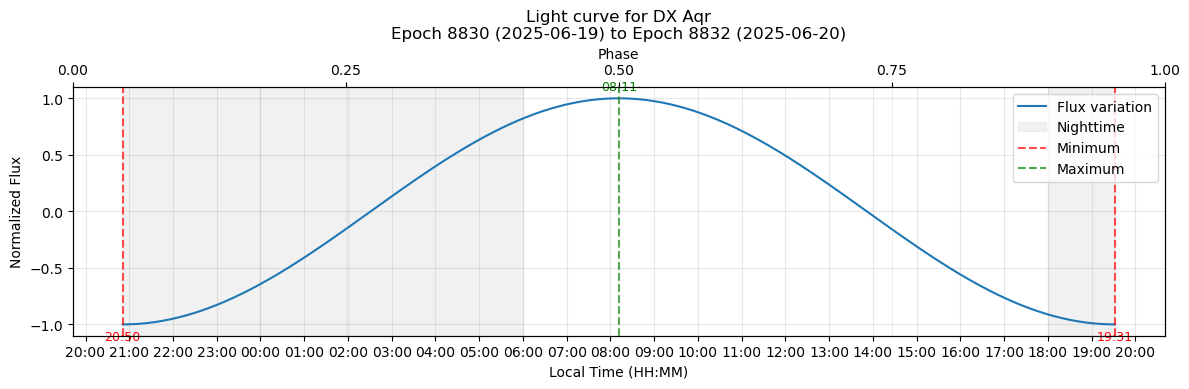

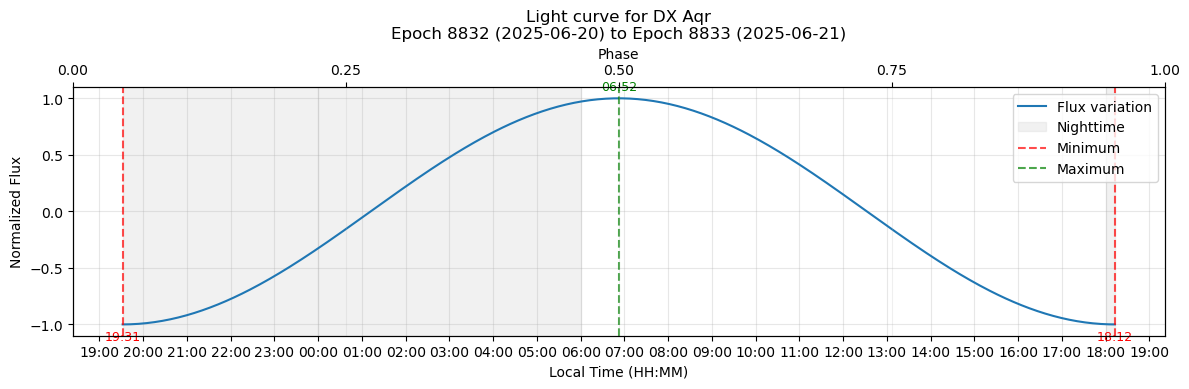

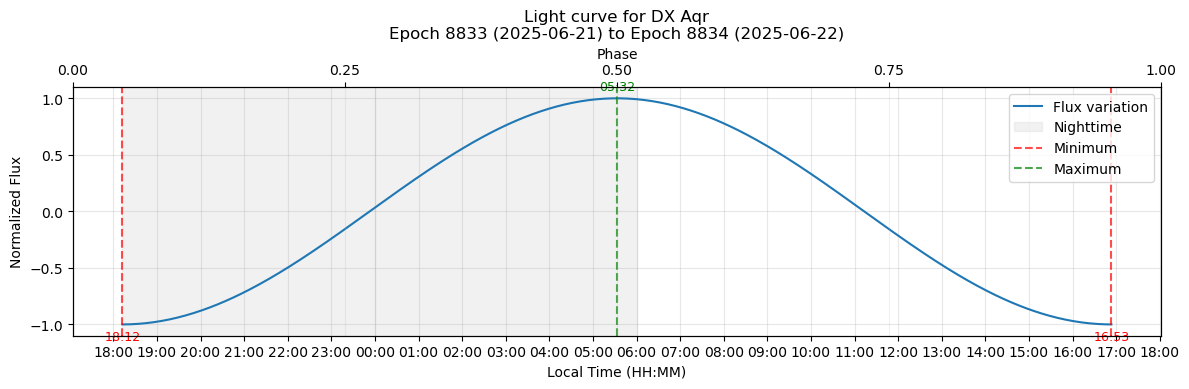

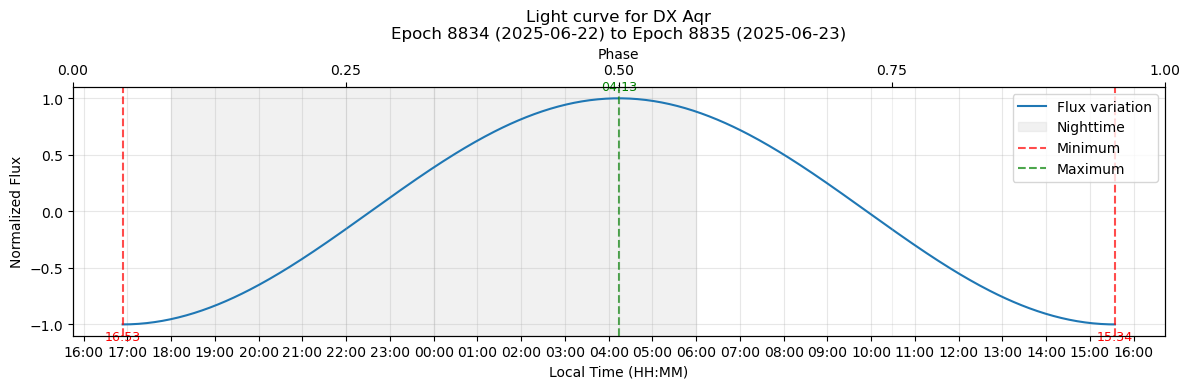

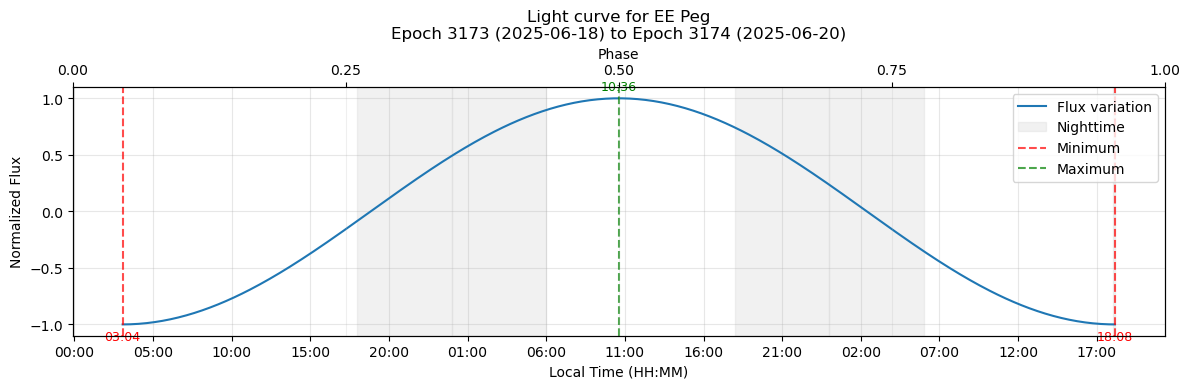

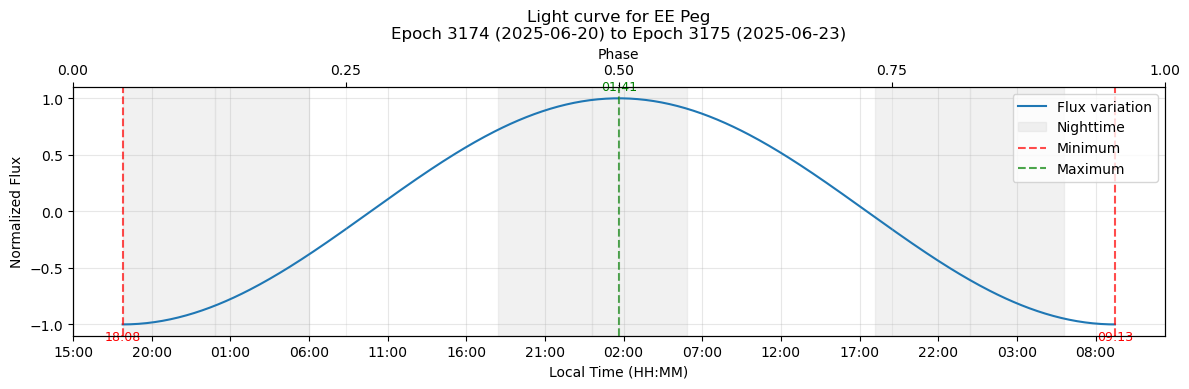

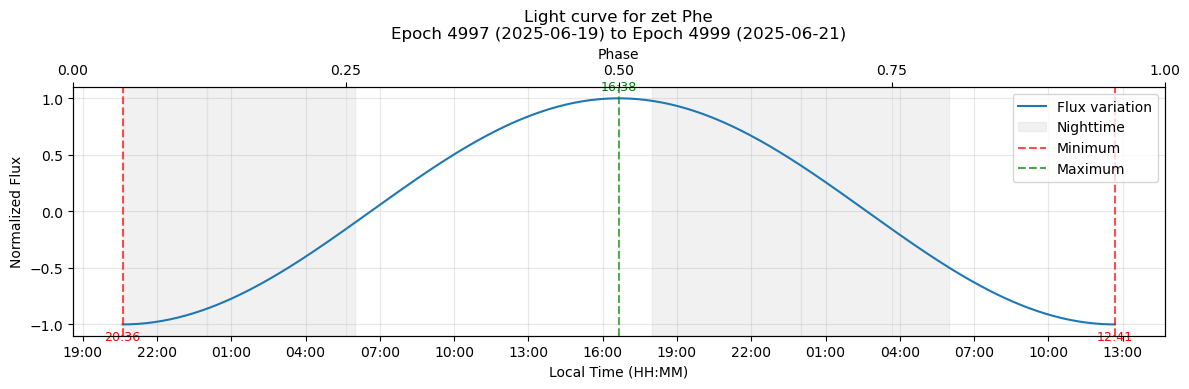

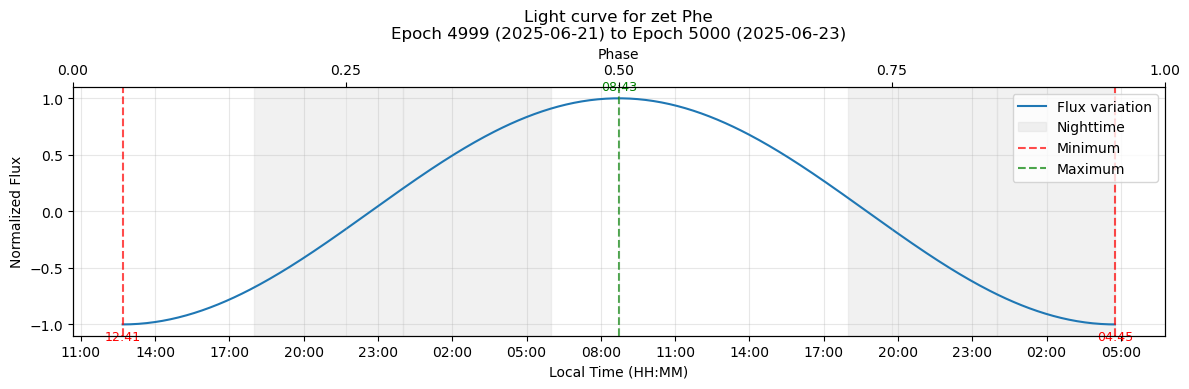

In [5]:
import pandas as pd
from astropy import time, coordinates as coord, units as u
from astropy.time import Time, TimeDelta
from astropy.coordinates import EarthLocation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter, HourLocator
import datetime

def query_objects(data):
    """Query objects from the database and remove duplicates by keeping first occurrence"""
    user_input = input("Enter object IDs and constellations (e.g., 'DX Aqr, EE Peg, V822 Aql, zet Phe'): ")
    queries = [tuple(q.strip().split()) for q in user_input.split(',') if q.strip()]
    results = data[data[['id', 'cons']].apply(tuple, axis=1).isin(queries)].copy()
    
    # Remove duplicates by keeping only first occurrence of each object
    results = results.drop_duplicates(subset=['id', 'cons'], keep='first')
    
    # Create SkyCoord objects for remaining unique objects
    results['tcoord'] = results.apply(
        lambda row: coord.SkyCoord(
            ra=f"{row['rah']}h{row['ram']}m{row['ras']}s",
            dec=f"{row['decd']}d{row['decm']}m{row['decs']}s"
        ),
        axis=1
    )
    return results


def hjd_to_jd(hjd, tcoord, obs_location):
    """Convert HJD to JD with light-time correction"""
    t_hjd = Time(hjd, format='jd', scale='utc')
    ltt = t_hjd.light_travel_time(tcoord, 'heliocentric', location=obs_location)
    return (t_hjd - ltt).jd

def calculate_minima(results, obs_location, tz_offset, start_utc, end_utc):
    """Calculate all minima within observation window"""
    minima_data = []
    for _, row in results.iterrows():
        e0_jd = hjd_to_jd(row['e0_hjd'], row['tcoord'], obs_location)
        period = row['period']
        ep_start = int((start_utc.jd - e0_jd) / period)
        tmin = e0_jd + max(0, ep_start) * period
        
        while tmin <= end_utc.jd:
            tmin_utc = Time(tmin, format='jd', scale='utc')
            tmin_local = tmin_utc.to_datetime() + pd.Timedelta(hours=tz_offset)
            epoch = int((tmin - e0_jd) / period)
            
            minima_data.append({
                'Object': f"{row['id']} {row['cons']}",
                'Epoch': epoch,
                'JD': tmin,
                'Local_JD': tmin + (tz_offset/24),
                'Local_Time': tmin_local.strftime('%Y-%m-%d %H:%M:%S'),
                'Period': period
            })
            tmin += period
    return pd.DataFrame(minima_data)

def plot_light_curves(minima_df, tz_offset):
    """Generate plots with nighttime shading between 18:00-24:00 and 00:00-06:00"""
    if minima_df.empty:
        print("No minima found to plot!")
        return
    
    for (obj, group) in minima_df.groupby('Object'):
        if len(group) < 2:
            print(f"Warning: Only one minimum found for {obj}, cannot plot light curve")
            continue
            
        for i in range(len(group)-1):
            row1 = group.iloc[i]
            row2 = group.iloc[i+1]
            
            # Create figure
            fig, ax = plt.subplots(figsize=(12, 4))
            
            # Generate light curve data between two minima
            jd_range = np.linspace(row1['JD'], row2['JD'], 500)
            phases = ((jd_range - row1['JD']) / row1['Period']) % 1
            flux = -np.cos(2 * np.pi * phases)
            
            # Convert to local datetime for plotting
            times = [Time(jd, format='jd').to_datetime() + pd.Timedelta(hours=tz_offset) 
                    for jd in jd_range]
            
            # Plot main curve with label
            ax.plot(times, flux, label=f"Flux variation")

            # Get the date range of the plot
            start_date = times[0].date()
            end_date = times[-1].date()
            current_date = start_date
            
            # Add nighttime shading (18:00-24:00 and 00:00-06:00) for all relevant days
            while current_date <= end_date:
                # Night starts at 18:00 on current date
                night_start_evening = datetime.datetime.combine(current_date, datetime.time(18, 0))
                
                # Night ends at midnight (00:00 next day)
                night_end_evening = datetime.datetime.combine(current_date + datetime.timedelta(days=1), datetime.time(0, 0))
                
                # Night starts at midnight
                night_start_morning = datetime.datetime.combine(current_date + datetime.timedelta(days=1), datetime.time(0, 0))
                
                # Night ends at 06:00 next day
                night_end_morning = datetime.datetime.combine(current_date + datetime.timedelta(days=1), datetime.time(6, 0))
                
                # Shade evening part (18:00 to 24:00)
                if times[-1] > night_start_evening and times[0] < night_end_evening:
                    shading_start = max(night_start_evening, times[0])
                    shading_end = min(night_end_evening, times[-1])
                    ax.axvspan(shading_start, shading_end, color='lightgray', alpha=0.3, label='Nighttime')
                
                # Shade morning part (00:00 to 06:00)
                if times[-1] > night_start_morning and times[0] < night_end_morning:
                    shading_start = max(night_start_morning, times[0])
                    shading_end = min(night_end_morning, times[-1])
                    ax.axvspan(shading_start, shading_end, color='lightgray', alpha=0.3)
                
                # Move to next day
                current_date += datetime.timedelta(days=1)
            
            # Mark minima (y=-1)
            min1_time = Time(row1['JD'], format='jd').to_datetime() + pd.Timedelta(hours=tz_offset)
            min2_time = Time(row2['JD'], format='jd').to_datetime() + pd.Timedelta(hours=tz_offset)
            
            ax.axvline(x=min1_time, color='r', linestyle='--', alpha=0.7, label='Minimum')
            ax.text(min1_time, -1.05, min1_time.strftime('%H:%M'),
                   ha='center', va='top', color='r', fontsize=9)
            
            ax.axvline(x=min2_time, color='r', linestyle='--', alpha=0.7)
            ax.text(min2_time, -1.05, min2_time.strftime('%H:%M'),
                   ha='center', va='top', color='r', fontsize=9)
            
            # Calculate and mark maxima (y=1)
            max_jd = (row1['JD'] + row2['JD']) / 2
            max_time = Time(max_jd, format='jd').to_datetime() + pd.Timedelta(hours=tz_offset)
            ax.axvline(x=max_time, color='g', linestyle='--', alpha=0.7, label='Maximum')
            ax.text(max_time, 1.05, max_time.strftime('%H:%M'),
                   ha='center', va='bottom', color='g', fontsize=9)
            
            # Format plot
            date1 = min1_time.strftime('%Y-%m-%d')
            date2 = min2_time.strftime('%Y-%m-%d')
            ax.set_title(f"Light curve for {obj}\nEpoch {row1['Epoch']} ({date1}) to Epoch {row2['Epoch']} ({date2})")
            ax.set_xlabel("Local Time (HH:MM)")
            ax.set_ylabel("Normalized Flux")
            
            # Set y-axis limits and ticks
            ax.set_ylim(-1.1, 1.1)
            ax.set_yticks([-1, -0.5, 0, 0.5, 1])
            
            # Set x-axis ticks to a maximum of 12 ticks
            total_hours = (times[-1] - times[0]).total_seconds() / 3600  # Total hours in the range
            num_ticks = min(12, int(total_hours))  # Maximum of 12 ticks
            ax.xaxis.set_major_locator(HourLocator(interval=int(total_hours / num_ticks)))
            ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
            ax.grid(True, alpha=0.3)
            
            # Create a second x-axis for phase
            ax_phase = ax.twiny()
            ax_phase.set_xlim(0, 1)  # Phase ranges from 0 to 1
            ax_phase.set_xticks(np.arange(0, 1.1, 0.1))  # Minor ticks for better readability
            ax_phase.set_xticks(np.arange(0, 1.25, 0.25), minor=False)  # Major ticks at 0, 0.25, ..., 1.0
            ax_phase.set_xlabel("Phase")
            ax_phase.xaxis.grid(True, alpha=0.2, which='both')
            
            # Handle legend - only show first occurrence of each label
            handles, labels = ax.get_legend_handles_labels()
            by_label = dict(zip(labels, handles))  # Deduplicate
            ax.legend(by_label.values(), by_label.keys(), loc='upper right')
            
            plt.tight_layout()
            plt.show()

def observation_planning(results, obs_location, tz_offset, start_utc, end_utc):
    """Plan observations and calculate minima"""
    minima_df = calculate_minima(results, obs_location, tz_offset, start_utc, end_utc)
    
    if minima_df.empty:
        print("No minima found in observation window!")
        return
    
    # Print results with full precision
    with pd.option_context('display.float_format', '{:.9f}'.format):
        print("\nCalculated Minima Results:")
        print(minima_df[['Object', 'Epoch', 'JD', 'Local_JD', 'Local_Time']].to_string(index=False))
    
    # Save to CSV with full precision
    minima_df.to_csv('minima_results.csv', index=False, float_format='%.9f')
    print(f"\nSaved {len(minima_df)} minima to 'minima_results.csv'")
    
    # Generate plots
    plot_light_curves(minima_df, tz_offset)

def main():
    # Load data
    data = pd.read_csv('ebcat_krakow.csv', header=0)
    
    # Query objects
    queried_data = query_objects(data)
    if queried_data.empty:
        print("No matching objects found!")
        return
    
    # Get observer location
    lat, lon = map(float, input("Enter latitude and longitude (deg, e.g. -6.8245 107.6159): ").split())
    alt = float(input("Enter altitude (in meters, e.g. 1310): "))
    tz_offset = float(input("Enter timezone offset (hours from UTC, e.g. 7 for Jakarta): "))
    obs_location = EarthLocation(lat=lat*u.deg, lon=lon*u.deg, height=alt*u.m)
    
    # Get observation window
    print("\nEnter observation window (local time):")
    start_str = input("  Start (YYYYMMDD HHMM, e.g. 20250620 1100): ").strip()
    end_str = input("  End (YYYYMMDD HHMM, e.g. 20250624 0500): ").strip()
    
    # Convert local time to UTC
    start_iso = f"{start_str[:4]}-{start_str[4:6]}-{start_str[6:8]}T{start_str[9:11]}:{start_str[11:13]}:00"
    end_iso = f"{end_str[:4]}-{end_str[4:6]}-{end_str[6:8]}T{end_str[9:11]}:{end_str[11:13]}:00"
    
    try:
        start_utc = Time(start_iso, format='isot', scale='utc') - TimeDelta(tz_offset*3600, format='sec')
        end_utc = Time(end_iso, format='isot', scale='utc') - TimeDelta(tz_offset*3600, format='sec')
    except Exception as e:
        print(f"Error parsing dates: {e}")
        return
    
    # Main execution
    observation_planning(queried_data, obs_location, tz_offset, start_utc, end_utc)

if __name__ == "__main__":
    main()
